$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 9} $$

$$ \text{Practical F.I.R. filter design via Python}
 $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ Aug\ 2016 $$

## Practical FIR filter design

* Impulse responses

* Frequency responses

* Design using firwin() command


# FIR filter: Numerator coefficients are on the move!

* Recall that magnitude of frequency response of $H(z)$ determines the filter type, i.e. Lowpass, Highpass and etc.


* $H(z)$ may have only ** zeroes ** for F.I.R. case.


* As the order of the filter increases, additional **poles at z=0** are required due to causality requirements.


# Lowpass Filter Design

- What is the Fourier transform of a pulse?


- What is the ideal frequency form of a low-pass filter?


- What is the impulse response of an ideal low-pass filter?


- What is the method to design the most ideal l.p.f ?


** Example: **

Using 3 coefficients (in numerator) we want to design an FIR low-pass filter with cut-off frequency 2kHz where $f_s$ = 8 kHz. 

- Since we have 3 coefficients,

$$ H(z) = \frac{b_0+b_1 z^{-1}+b_2 z^{-2}}{z^{-2}} $$

This filter has two zeroes and a two-fold pole at $z=0$. 

By using **firwin()** command from "scipy.signal" module, we can pass the specifications as

    - num = firwin(Ncoefs, cut-off)

The cut-off should be the value that is obtained by division of normalized angular frequency with $\pi$.

For this case, we have

$$ f_c = 2000 \to \Omega _c = \frac{2\pi 2000}{8000} = 0.5 \pi$$

Thus the inputs are:

* Ncoefs = 3
* cut-off = 0.5







In [3]:
%pylab inline 
from scipy.signal import *

Populating the interactive namespace from numpy and matplotlib



`%matplotlib` prevents importing * from pylab and numpy


Lowpass numerator coefficients =  [ 0.0462215  0.907557   0.0462215]


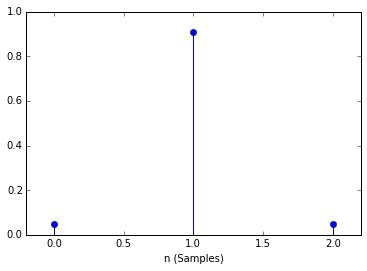

In [4]:
wc = 0.5*pi
Ncoefs =3 

bLP1 = firwin(Ncoefs, wc/pi)

print 'Lowpass numerator coefficients = ', bLP1;

stem([0,1,2], bLP1),
xlim([-.2, 2.2])
xlabel('n (Samples)')

** Effect of order **

As the number of coefficients increase, the order of the filter also increases.

- Now let's generate lowpass filters with 13 and 41 coefficients.
- These are order 12 and order 40 lowpass filters, respectively.

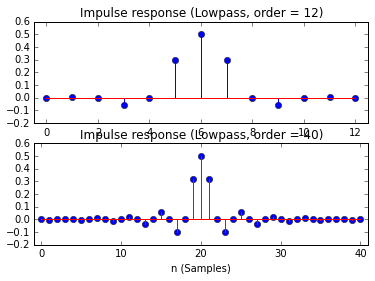

In [5]:
bLP2 = firwin(13, wc/pi)

bLP3 = firwin(41, wc/pi)

subplot(2,1,1)
stem(arange(13), bLP2),
xlabel('n (Samples)')
title('Impulse response (Lowpass, order = 12)')
ylim([-.2,.6]);xlim([-.5, 12.5])
subplot(2,1,2)
stem(arange(41), bLP3,'r')
title('Impulse response (Lowpass, order = 40)')
xlabel('n (Samples)')
ylim([-.2,.6]);xlim([-1, 41]);

** Impulse response analysis **

Each impulse response
- has $ order +1$ impulses
- is delayed by $ order / 2 $ for causal realization

What about Frequency Responses?


** Frequency responses for different orders**



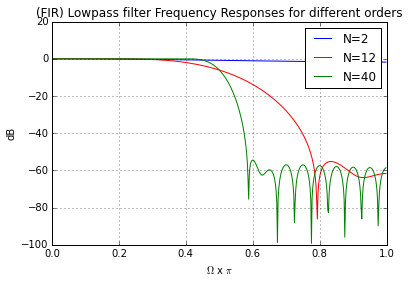

In [6]:
w, H_LP1 = freqz(bLP1,1)
w, H_LP2 = freqz(bLP2,1)
w, H_LP3 = freqz(bLP3,1)

plot(w/pi,20*log10(abs(H_LP1)))
grid(True)
hold(True)
plot(w/pi,20*log10(abs(H_LP2)),'r')
plot(w/pi,20*log10(abs(H_LP3)),'g')
legend(('N=2','N=12','N=40'))
title('(FIR) Lowpass filter Frequency Responses for different orders')
ylabel('dB')
xlabel('$\Omega$ x $\pi$')

** Frequency response analysis **

As the order of the filter increases, the filter's transition band becomes narrower and frequency response becomes sharper through cut-off frequency (which is $0.5 \pi$ for this case).
- is delayed by $ order / 2 $ for causal realization

What about Frequency Responses?

# High-Pass filter design

- Now we want to transfer the highest order (12 and 40) lowpass filters to high-pass filters.

- By directly generating them via Python, we can see what changes in impulse response.


(-0.5, 12.5)

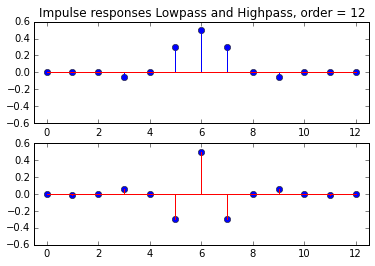

In [7]:
bHP2 = firwin(13, wc/pi,pass_zero=False)

bHP3 = firwin(41, wc/pi,pass_zero=False)

subplot(2,1,1)
stem(arange(13), bLP2)
xlabel('n (Samples)')
title('Impulse responses Lowpass and Highpass, order = 12')
ylim([-.6,.6]);xlim([-.5, 12.5])
subplot(2,1,2)

stem(arange(13), bHP2,'r')
ylim([-.6,.6]);xlim([-.5, 12.5])


(-0.5, 41.5)

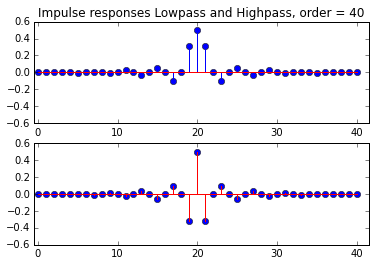

In [8]:
subplot(2,1,1)
stem(arange(41), bLP3)
xlabel('n (Samples)')
title('Impulse responses Lowpass and Highpass, order = 40')
ylim([-.6,.6]);xlim([-.5, 41.5])
subplot(2,1,2)

stem(arange(41), bHP3,'r')
ylim([-.6,.6]);xlim([-.5, 41.5])

** Frequency Responses: Highpass filter **

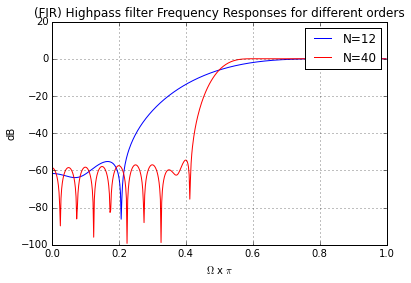

In [9]:
w, H_HP2 = freqz(bHP2,1)
w, H_HP3 = freqz(bHP3,1)

plot(w/pi,20*log10(abs(H_HP2)))
grid(True)
hold(True)
plot(w/pi,20*log10(abs(H_HP3)),'r')

legend(('N=12','N=40'))
title('(FIR) Highpass filter Frequency Responses for different orders')
ylabel('dB')
xlabel('$\Omega$ x $\pi$')

# Application of filters to a multi-tone signal

- Now we will generate a multi component sinusoidal signal with frequencies 440 Hz, 3 kHz and 10 kHz that is sampled at $f_s$ 44100 Hz. We choose an arbitrary duration of 3 seconds.

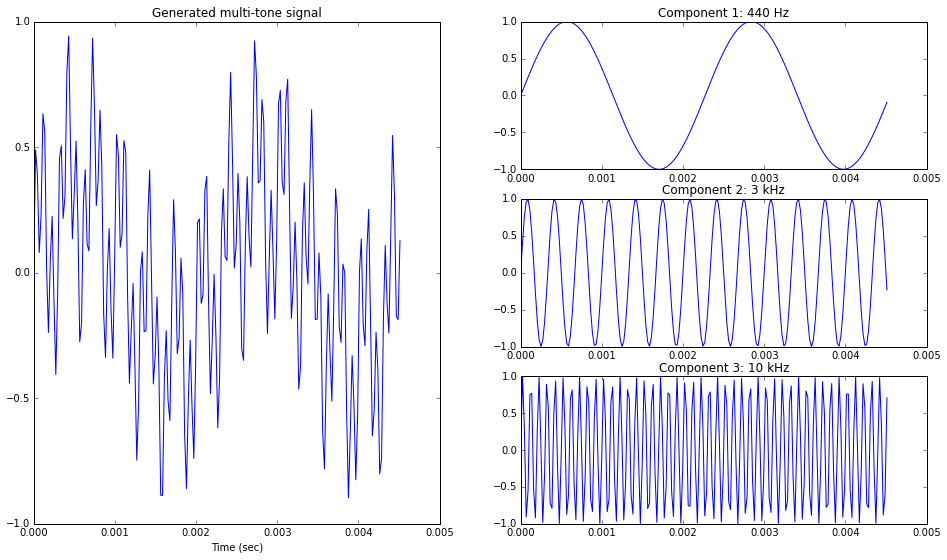

In [10]:
rcParams['figure.figsize']=(16,9)

fs = 44100.0
t = arange(3*fs) /fs

comp1 = sin(2*pi*440*t);
comp2 = sin(2*pi*3000*t);
comp3 = sin(2*pi*10000*t);

x = comp1+comp2 + comp3
x = x /3.0 
subplot(1,2,1)
plot(t[0:200],x[0:200])
xlabel('Time (sec)');
title('Generated multi-tone signal');
subplot(3,2,2)
plot(t[0:200],comp1[0:200])
title('Component 1: 440 Hz')
subplot(3,2,4)
plot(t[0:200],comp2[0:200])
title('Component 2: 3 kHz')
subplot(3,2,6)
plot(t[0:200],comp3[0:200])
title('Component 3: 10 kHz')

In [11]:
from IPython.display import Audio
Audio(data =x, rate= fs )
# Multi-tone signal

** Lowpass Filtering **

Now we will design a filter that will only pass 400 Hz component. For this we have to design a lowpass filter with a cut-off frequency larger than 400 Hz. Let's pick cut-off as 700 Hz and order as 100.

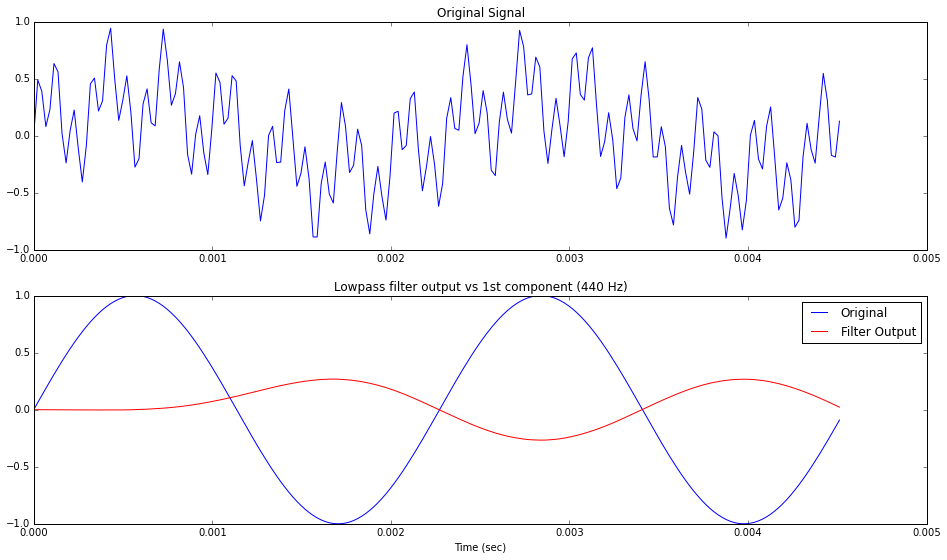

In [12]:

wcLP = 2*pi*700/fs

bLP = firwin(101,wcLP/pi)

outputLP = lfilter(bLP,1,x)

subplot(2,1,1)
plot(t[0:200],x[0:200])
title('Original Signal')

subplot(2,1,2)
plot(t[0:200],comp1[0:200])
hold(True)
plot(t[0:200],outputLP[0:200],'r')
xlabel('Time (sec)');
title('Lowpass filter output vs 1st component (440 Hz)');
legend(('Original','Filter Output'))

In [13]:
Audio(data =outputLP, rate= fs )
# Lowpass filtered signal (fc=700 Hz)

** High pass filtering **

By using a highpass filter, we can omit the lower frequencies 440 Hz and 3 kHz from the original signal. Thus, we need to design a highpass filter with a cut-ff frequency that is smaller than 10 kHz.
Let's pick it as 6 kHz and order, again, 100.

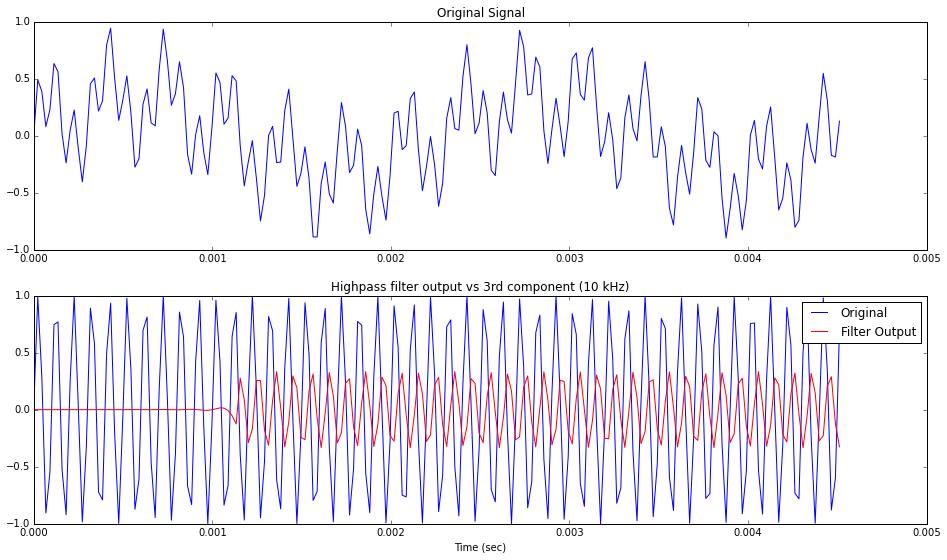

In [14]:
wcHP = 2*pi*6000/fs

bHP = firwin(101,wcHP/pi,pass_zero=False)

outputHP = lfilter(bHP,1,x)

subplot(2,1,1)
plot(t[0:200],x[0:200])
title('Original Signal')

subplot(2,1,2)
plot(t[0:200],comp3[0:200])
hold(True)
plot(t[0:200],outputHP[0:200],'r')
xlabel('Time (sec)');
title('Highpass filter output vs 3rd component (10 kHz)');
legend(('Original','Filter Output'))

In [15]:
Audio(data =outputHP, rate= fs )
# Highpass filtered signal (fc=6 kHz)

** Bandpass filtering **

Finally, to extract only the middle component, 3kHz, we need to omit 440 Hz and 10 kHz. For this, we need to design a bandpass filter with lower cut-off frequency that is larger than 440 Hz and an higher cut-off frequency that is smaller than 10 kHz. Let's pick the cut-offs as the previous ones, 700 Hz and 6000 kHz.

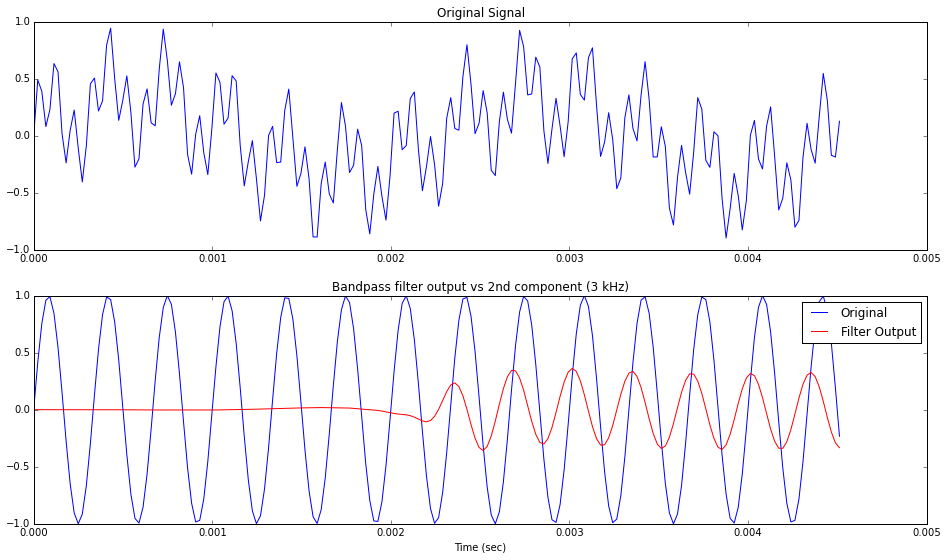

In [16]:
wcBP = [2*700/fs, 2*6000/fs]

bBP = firwin(201,wcBP,pass_zero=False)

outputBP = lfilter(bBP,1,x)

subplot(2,1,1)
plot(t[0:200],x[0:200])
title('Original Signal')

subplot(2,1,2)
plot(t[0:200],comp2[0:200])
hold(True)
plot(t[0:200],outputBP[0:200],'r')
xlabel('Time (sec)');
title('Bandpass filter output vs 2nd component (3 kHz)');
legend(('Original','Filter Output'))

In [17]:
Audio(data =outputBP, rate= fs )
# Bandpass filtered signal (fc= [ 700 Hz, 6 kHz])